In [515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import xlrd
import os

# Read & Import csv file as DataFrame

In [516]:
cab_data = pd.read_csv('/Users/jacksonyoung/Downloads/DataSets-main/Cab_Data.csv')
city_data = pd.read_csv('/Users/jacksonyoung/Downloads/DataSets-main/City.csv')
customer_data = pd.read_csv('/Users/jacksonyoung/Downloads/DataSets-main/Customer_ID.csv')
transaction_data = pd.read_csv('/Users/jacksonyoung/Downloads/DataSets-main/Transaction_ID.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jacksonyoung/Downloads/DataSets-main/Cab_Data.csv'

In [517]:
cab_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [518]:
city_data.head(10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [519]:
customer_data.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [520]:
transaction_data.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


## Observation:
 - customer_data['customer_id'] = transaction_data['customer_id']
 - transaction_data['transactoin_id']= cab_data['transaction_id']
 - cab_data['city'] = city_data['city'] 
 - it will be easier and more efficient for me to EDA if I join these 4 tables above

In [521]:
print(cab_data.isna().sum(),city_data.isna().sum(),customer_data.isna().sum(),transaction_data.isna().sum())
# there is no Null value in these 4 tables
print('cab_data shape:',cab_data.shape,
      'city_data shape:',city_data.shape,
      'customer_data shape:',customer_data.shape,
      'transaction_data shape:',transaction_data.shape)
print(cab_data.info(),city_data.info(),customer_data.info(),transaction_data.info())

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64 City          0
Population    0
Users         0
dtype: int64 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64
cab_data shape: (359392, 7) city_data shape: (20, 3) customer_data shape: (49171, 4) transaction_data shape: (440098, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   

# Merge data into one table for further EDA

In [522]:
# join customer_data, transactoin data on Customer ID first
df_merge_cus_tran = pd.merge(customer_data,transaction_data,left_on= 'Customer ID',right_on='Customer ID', how='right')

In [523]:
print(df_merge_cus_tran.isna().sum(), df_merge_cus_tran.shape)

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Transaction ID        0
Payment_Mode          0
dtype: int64 (440098, 6)


In [524]:
# join df_merge_cus_tran with cab_data on transaction_id
df_merge_cus_tran_cab = pd.merge(df_merge_cus_tran, cab_data, left_on='Transaction ID', right_on='Transaction ID')

In [525]:
print(df_merge_cus_tran_cab.isna().sum(), df_merge_cus_tran_cab.shape)

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Transaction ID        0
Payment_Mode          0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
dtype: int64 (359392, 12)


In [526]:
# join df_merge_cus_tran_cab with city_data on city
merged_data = pd.merge(df_merge_cus_tran_cab, city_data, left_on='City', right_on='City')

In [527]:
print(merged_data.isna().sum(), merged_data.shape)

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Transaction ID        0
Payment_Mode          0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
dtype: int64 (359392, 14)


# Merged_data EDA
1. Preprocess data
    - check null value
    - check duplicates
    - find out categorical value counts
    - converting dataformat
2. EDA

### 1. Preprocess data

In [528]:
merged_data.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,28712,Male,53,11242,10000013,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,28020,Male,23,23327,10000014,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,27182,Male,33,8536,10000015,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [529]:
# non of these data are duplicated
merged_data.drop_duplicates()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
2,28712,Male,53,11242,10000013,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701"
3,28020,Male,23,23327,10000014,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701"
4,27182,Male,33,8536,10000015,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,52392,Male,24,15651,10440101,Cash,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001"
359388,53286,Male,32,6528,10440104,Cash,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001"
359389,52265,Male,56,7966,10440105,Cash,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001"
359390,52175,Male,32,6423,10440106,Card,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001"


#### - Split City into city and state

In [530]:
US_States = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

state = []
city = []

for i in range(len(merged_data)):
    if merged_data.City[i].split()[~0] in US_States:
        city.append(merged_data.City[i].split(f' {merged_data.City[i].split()[~0]}')[0])
        state.append(merged_data.City[i].split()[~0])
    else:
        city.append(merged_data.City[i])
        state.append(np.nan)

In [531]:
merged_data['City'] = city
merged_data['State'] = state
merged_data

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,State
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA,30.45,370.95,313.6350,"814,885","24,701",GA
1,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA,28.62,358.52,334.8540,"814,885","24,701",GA
2,28712,Male,53,11242,10000013,Cash,42371,Pink Cab,ATLANTA,9.04,125.20,97.6320,"814,885","24,701",GA
3,28020,Male,23,23327,10000014,Cash,42376,Pink Cab,ATLANTA,33.17,377.40,351.6020,"814,885","24,701",GA
4,27182,Male,33,8536,10000015,Card,42372,Pink Cab,ATLANTA,8.73,114.62,97.7760,"814,885","24,701",GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,52392,Male,24,15651,10440101,Cash,43108,Yellow Cab,WASHINGTON,4.80,69.24,63.3600,"418,859","127,001",DC
359388,53286,Male,32,6528,10440104,Cash,43104,Yellow Cab,WASHINGTON,8.40,113.75,106.8480,"418,859","127,001",DC
359389,52265,Male,56,7966,10440105,Cash,43105,Yellow Cab,WASHINGTON,27.75,437.07,349.6500,"418,859","127,001",DC
359390,52175,Male,32,6423,10440106,Card,43105,Yellow Cab,WASHINGTON,8.80,146.19,114.0480,"418,859","127,001",DC


#### find out categorical values counts

In [532]:
for col_name in merged_data.columns:
    if merged_data[col_name].dtypes == 'object':
        unique_cat = len(merged_data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Gender' has 2 unique categories
Feature 'Payment_Mode' has 2 unique categories
Feature 'Company' has 2 unique categories
Feature 'City' has 19 unique categories
Feature 'Population' has 19 unique categories
Feature 'Users' has 19 unique categories
Feature 'State' has 14 unique categories


In [533]:
print(merged_data.City.unique())
print(merged_data.State.unique())

['ATLANTA' 'AUSTIN' 'BOSTON' 'CHICAGO' 'DALLAS' 'DENVER' 'LOS ANGELES'
 'MIAMI' 'NASHVILLE' 'NEW YORK' 'ORANGE COUNTY' 'PHOENIX' 'PITTSBURGH'
 'SACRAMENTO' 'SAN DIEGO' 'SEATTLE' 'SILICON VALLEY' 'TUCSON' 'WASHINGTON']
['GA' 'TX' 'MA' 'IL' 'CO' 'CA' 'FL' 'TN' 'NY' nan 'AZ' 'PA' 'WA' 'DC']


#### relacing columns' '  ' with '_' 

In [534]:
merged_data.columns = [col.strip().replace(' ', '_').lower() for col in merged_data.columns]

In [535]:
merged_data.columns

Index(['customer_id', 'gender', 'age', 'income_(usd/month)', 'transaction_id',
       'payment_mode', 'date_of_travel', 'company', 'city', 'km_travelled',
       'price_charged', 'cost_of_trip', 'population', 'users', 'state'],
      dtype='object')

In [536]:
# sort data by 'day of travel' and 'transcation_id'
merged_data.sort_values(['date_of_travel', 'transaction_id'], ignore_index=True, inplace = True, ascending = True)

In [537]:
# change date of travel in64 to datetime64
merged_data['date_of_travel'] = pd.TimedeltaIndex(merged_data['date_of_travel'], unit='d') + dt.datetime(1899, 12, 30)

In [538]:
merged_data

,customer_id,gender,age,income_(usd/month),transaction_id,payment_mode,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,population,users,state
0,28712,Male,53,11242,10000013,Cash,2016-01-02,Pink Cab,ATLANTA,9.04,125.20,97.6320,"814,885","24,701",GA
1,58925,Male,38,26550,10000029,Card,2016-01-02,Pink Cab,BOSTON,21.34,324.21,226.2040,"248,968","80,021",MA
2,58551,Male,25,21734,10000030,Card,2016-01-02,Pink Cab,BOSTON,41.30,646.06,454.3000,"248,968","80,021",MA
3,4289,Male,19,28719,10000041,Card,2016-01-02,Pink Cab,CHICAGO,35.02,598.43,406.2320,"1,955,130","164,468",IL
4,5734,Male,23,22475,10000045,Card,2016-01-02,Pink Cab,CHICAGO,3.24,48.04,33.6960,"1,955,130","164,468",IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,52449,Female,40,23569,10439960,Card,2018-12-31,Yellow Cab,WASHINGTON,33.93,474.47,411.2316,"418,859","127,001",DC
359388,51614,Female,55,12279,10439984,Card,2018-12-31,Yellow Cab,WASHINGTON,40.00,641.78,484.8000,"418,859","127,001",DC
359389,52389,Female,29,5568,10440028,Card,2018-12-31,Yellow Cab,WASHINGTON,26.22,405.25,327.2256,"418,859","127,001",DC
359390,51877,Male,46,16993,10440034,Cash,2018-12-31,Yellow Cab,WASHINGTON,34.68,505.38,470.2608,"418,859","127,001",DC


In [539]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         359392 non-null  int64         
 1   gender              359392 non-null  object        
 2   age                 359392 non-null  int64         
 3   income_(usd/month)  359392 non-null  int64         
 4   transaction_id      359392 non-null  int64         
 5   payment_mode        359392 non-null  object        
 6   date_of_travel      359392 non-null  datetime64[ns]
 7   company             359392 non-null  object        
 8   city                359392 non-null  object        
 9   km_travelled        359392 non-null  float64       
 10  price_charged       359392 non-null  float64       
 11  cost_of_trip        359392 non-null  float64       
 12  population          359392 non-null  object        
 13  users               359392 no

In [540]:
# we need to change users object and polulation object to int64
# also, the ',' need to be removed for better data manipulation
merged_data.population = [merged_data.population[i].replace(",", "") for i in range(len(merged_data))]
merged_data.users = [merged_data.users[i].replace(",","") for i in range(len(merged_data))]

In [541]:
merged_data.population = merged_data.population.astype('int64')
merged_data.users = merged_data.users.astype('int64')

In [542]:
# Split date of travel into Year Month Day and day of week
merged_data['year'] = merged_data['date_of_travel'].dt.year
merged_data['month'] = merged_data['date_of_travel'].dt.month
merged_data['date'] = merged_data['date_of_travel'].dt.day
merged_data['day_of_week'] = merged_data['date_of_travel'].dt.dayofweek


In [543]:
merged_data

,customer_id,gender,age,income_(usd/month),transaction_id,payment_mode,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,population,users,state,year,month,date,day_of_week
0,28712,Male,53,11242,10000013,Cash,2016-01-02,Pink Cab,ATLANTA,9.04,125.20,97.6320,814885,24701,GA,2016,1,2,5
1,58925,Male,38,26550,10000029,Card,2016-01-02,Pink Cab,BOSTON,21.34,324.21,226.2040,248968,80021,MA,2016,1,2,5
2,58551,Male,25,21734,10000030,Card,2016-01-02,Pink Cab,BOSTON,41.30,646.06,454.3000,248968,80021,MA,2016,1,2,5
3,4289,Male,19,28719,10000041,Card,2016-01-02,Pink Cab,CHICAGO,35.02,598.43,406.2320,1955130,164468,IL,2016,1,2,5
4,5734,Male,23,22475,10000045,Card,2016-01-02,Pink Cab,CHICAGO,3.24,48.04,33.6960,1955130,164468,IL,2016,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,52449,Female,40,23569,10439960,Card,2018-12-31,Yellow Cab,WASHINGTON,33.93,474.47,411.2316,418859,127001,DC,2018,12,31,0
359388,51614,Female,55,12279,10439984,Card,2018-12-31,Yellow Cab,WASHINGTON,40.00,641.78,484.8000,418859,127001,DC,2018,12,31,0
359389,52389,Female,29,5568,10440028,Card,2018-12-31,Yellow Cab,WASHINGTON,26.22,405.25,327.2256,418859,127001,DC,2018,12,31,0
359390,51877,Male,46,16993,10440034,Cash,2018-12-31,Yellow Cab,WASHINGTON,34.68,505.38,470.2608,418859,127001,DC,2018,12,31,0


In [544]:
merged_data.to_csv('/Users/jacksonyoung/Desktop/Data Glacier/Week2 Cab/data/merged_data.csv', index = False)

### 2.EDA

In [545]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         359392 non-null  int64         
 1   gender              359392 non-null  object        
 2   age                 359392 non-null  int64         
 3   income_(usd/month)  359392 non-null  int64         
 4   transaction_id      359392 non-null  int64         
 5   payment_mode        359392 non-null  object        
 6   date_of_travel      359392 non-null  datetime64[ns]
 7   company             359392 non-null  object        
 8   city                359392 non-null  object        
 9   km_travelled        359392 non-null  float64       
 10  price_charged       359392 non-null  float64       
 11  cost_of_trip        359392 non-null  float64       
 12  population          359392 non-null  int64         
 13  users               359392 no

### Visualization - demographic - population - users

In [546]:
demograph = merged_data.groupby(['state', 'city']).mean()[['population', 'users']].sum(level = 0)

<ipython-input-546-9924759987d2>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  demograph = merged_data.groupby(['state', 'city']).mean()[['population', 'users']].sum(level = 0)


In [547]:
demograph['non-users'] = demograph['population'] - demograph['users']

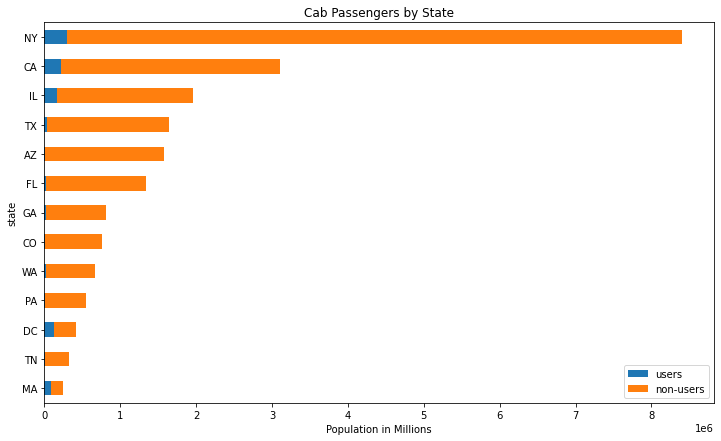

In [548]:
demograph.sort_values(['population', 'users'])[['users', 'non-users']].\
plot(kind = 'barh', stacked = True, figsize = (12, 7), title = "Cab Passengers by State");

plt.xlabel("Population in Millions");


NY has the highest number of users, followed by CA and IL

<ipython-input-549-6fe7f5d22445>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  city = merged_data.groupby(['city']).mean()[['population','users']].sum(level=0)


Text(0.5, 0, 'Population in Millions')

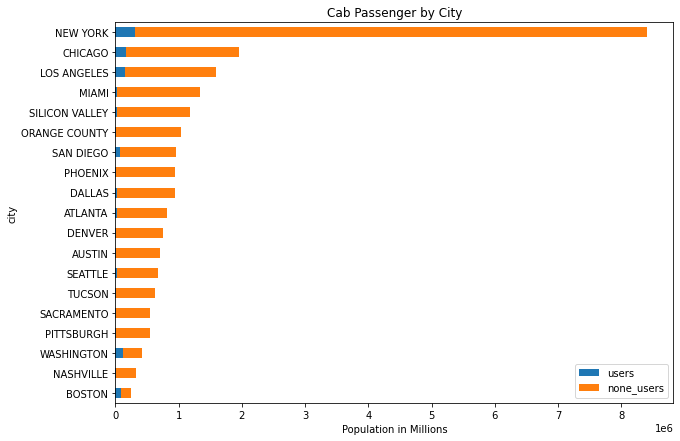

In [549]:
city = merged_data.groupby(['city']).mean()[['population','users']].sum(level=0)
city['none_users']=city['population']-city['users']
city.sort_values(['population','users'])[['users','none_users']].\
plot(kind = 'barh', stacked = True, figsize=(10,7), title="Cab Passenger by City")
plt.xlabel("Population in Millions")

New York city has the highest number of users, then Chicago and Los Angeles

### Visualization - customer gender - company

In [550]:
# Proporttion of Male and Female Customers
print( merged_data.gender.value_counts(normalize=True))

Male      0.572945
Female    0.427055
Name: gender, dtype: float64


/Users/jacksonyoung/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


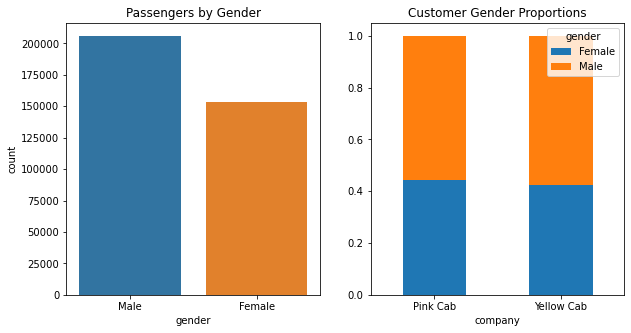

In [551]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(merged_data.gender, ax = ax[0]).set_title("Passengers by Gender");

pd.crosstab(index = merged_data.company, columns = merged_data.gender, normalize = 'index').\
plot(kind = 'bar', stacked = True, ax = ax[1], rot = 0, title = "Customer Gender Proportions");

- The number of Male customers are larger than Female customers
- But for both company, Female customers' proportion is little larger than Male

### Visualization - Daily trips count - company - different time windows

In [552]:
trip = merged_data.groupby(['date_of_travel','company']).size().reset_index().rename(columns={0:'count'})
trip

,date_of_travel,company,count
0,2016-01-02,Pink Cab,41
1,2016-01-02,Yellow Cab,140
2,2016-01-03,Pink Cab,52
3,2016-01-03,Yellow Cab,126
4,2016-01-04,Pink Cab,4
...,...,...,...
2185,2018-12-29,Yellow Cab,630
2186,2018-12-30,Pink Cab,56
2187,2018-12-30,Yellow Cab,201
2188,2018-12-31,Pink Cab,58


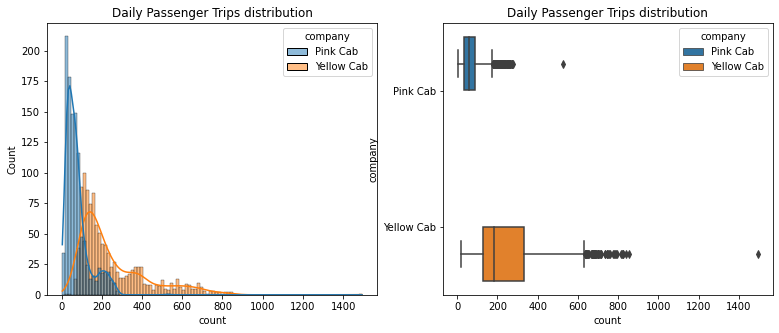

In [553]:
fig, ax = plt.subplots(1,2, figsize = (13,5))
sns.histplot(x = 'count', hue = 'company', data = trip, kde = True, 
             bins = 100, ax = ax[0]).set_title("Daily Passenger Trips distribution");

sns.boxplot(x = 'count', y = 'company', data = trip, hue = 'company',
            ax = ax[1]).set_title("Daily Passenger Trips distribution");

- Yellow cab has higher median trip counts than pink cab
- Extremlly high trip counts are rare, we can conclude these as outliers for our analysis

Text(0, 0.5, 'Couts of Trips')

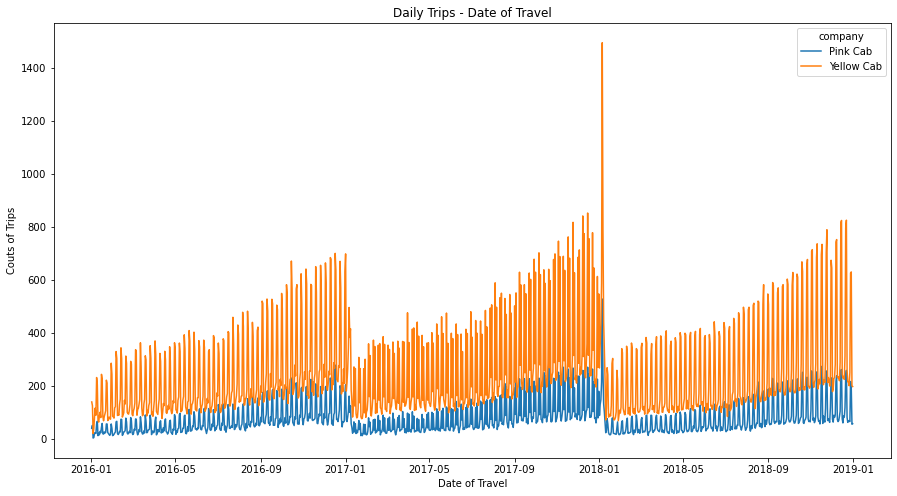

In [554]:
plt.figure(figsize=(15,8))
sns.lineplot(x = 'date_of_travel', y='count', data = trip, hue = 'company')
plt.title('Daily Trips - Date of Travel')
plt.xlabel('Date of Travel')
plt.ylabel('Couts of Trips')

- Yellow Cab has higher trip counts overall between 2016-01 to 2019-01
- For both cab company, count of trip between every Nov to Jan was boosted significantly
- The seasonality effect and holiday effect might be important factors to cause this increasment of trip demand
- For 2018-01, both compnay reached their highest trip count

##### Find out seaonality change in smaller scale 

In [555]:
month_trip = merged_data.groupby(['year','month','company']).size().reset_index().rename(columns={0:'count'})

In [556]:
month_trip['month_level'] = month_trip['year'].astype('str') + "-" + month_trip['month'].astype('str')
month_trip

,year,month,company,count,month_level
0,2016,1,Pink Cab,927,2016-1
1,2016,1,Yellow Cab,3719,2016-1
2,2016,2,Pink Cab,1050,2016-2
3,2016,2,Yellow Cab,4674,2016-2
4,2016,3,Pink Cab,1231,2016-3
...,...,...,...,...,...
67,2018,10,Yellow Cab,9727,2018-10
68,2018,11,Pink Cab,3897,2018-11
69,2018,11,Yellow Cab,11230,2018-11
70,2018,12,Pink Cab,3800,2018-12


Text(0, 0.5, 'Number of Trips')

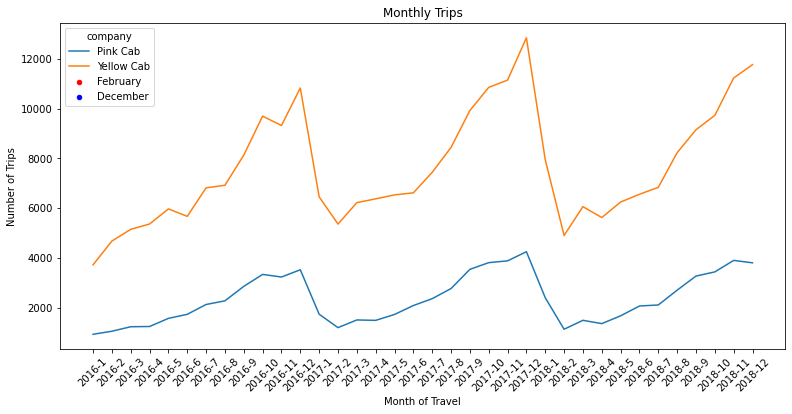

In [557]:
plt.figure(figsize = (13,6))
ax = sns.lineplot(x = 'month_level', y = 'count', data = month_trip, hue = 'company')

for month, name, color in zip([2,12], ['February', 'December'], ['red', 'blue']):
    month_trip.query(f"month == '{month}'")[['month_level', 'count']].\
    plot.scatter(x = 'month_level', y = 'count', ax = ax, label = f'{name}', color = color)

plt.xticks(rotation = 45)
plt.title('Monthly Trips')
plt.xlabel('Month of Travel')
plt.ylabel('Number of Trips')

- It is true that the end of every year, both compnay will reach their trip counts' Local Maximum
- Then, Feb of every year, both company will reach their trip counts' Local Minimun

#### Lets see which city contribute the most of the trip counts

In [558]:
month_trip_city = merged_data.groupby(['year','month','city','company']).size().reset_index().rename(columns={0:'count'})

In [559]:
month_trip_city['month_level'] = month_trip_city['year'].astype('str') + "_" + month_trip_city['month'].astype('str')
month_trip_city


,year,month,city,company,count,month_level
0,2016,1,ATLANTA,Pink Cab,21,2016_1
1,2016,1,ATLANTA,Yellow Cab,85,2016_1
2,2016,1,AUSTIN,Pink Cab,7,2016_1
3,2016,1,AUSTIN,Yellow Cab,24,2016_1
4,2016,1,BOSTON,Pink Cab,72,2016_1
...,...,...,...,...,...,...
1363,2018,12,SILICON VALLEY,Yellow Cab,205,2018_12
1364,2018,12,TUCSON,Pink Cab,29,2018_12
1365,2018,12,TUCSON,Yellow Cab,50,2018_12
1366,2018,12,WASHINGTON,Pink Cab,188,2018_12


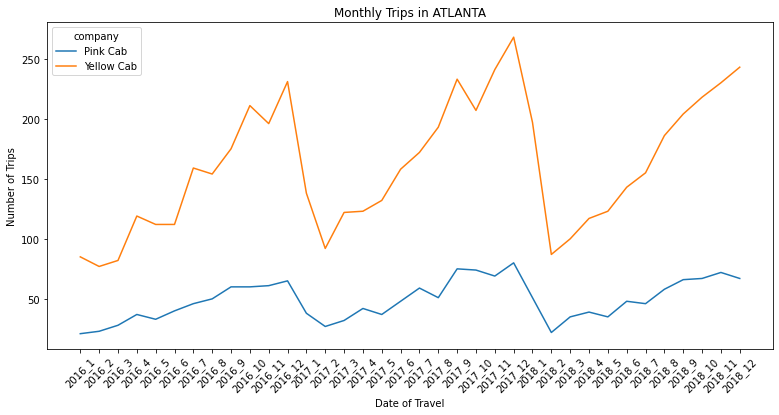

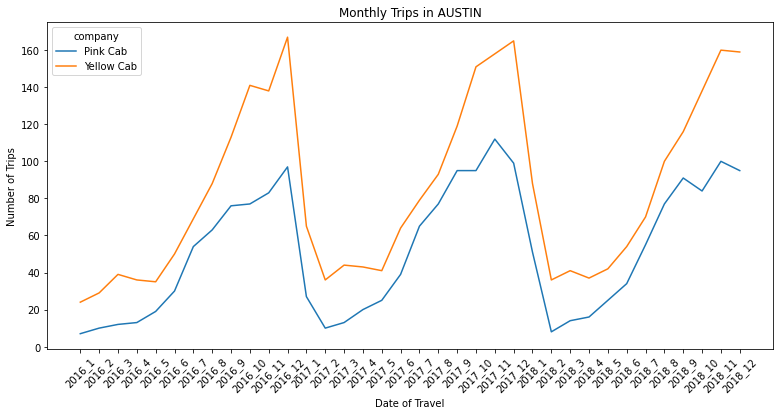

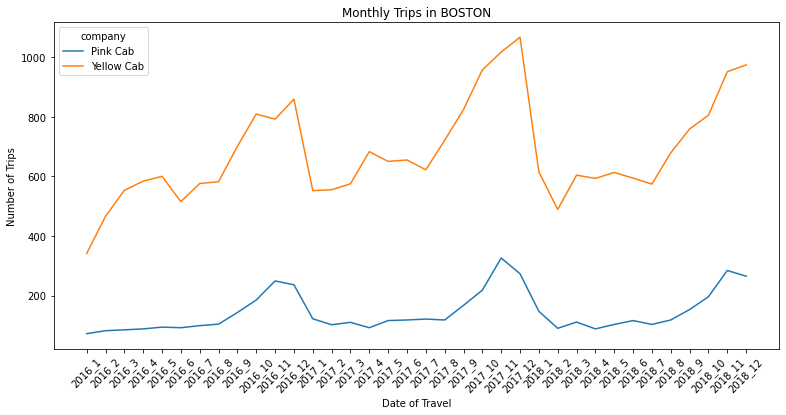

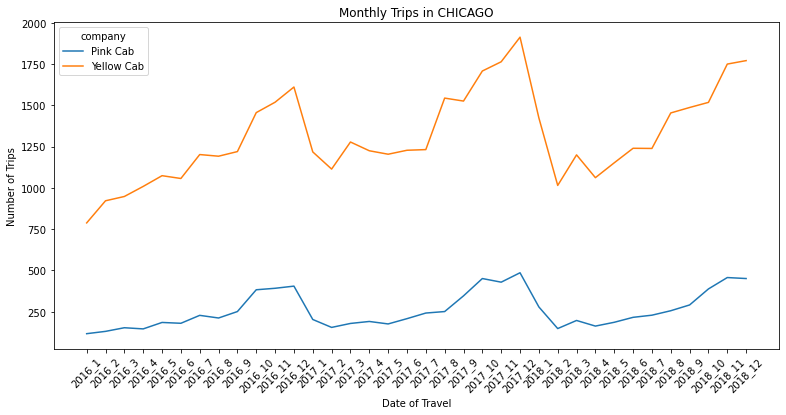

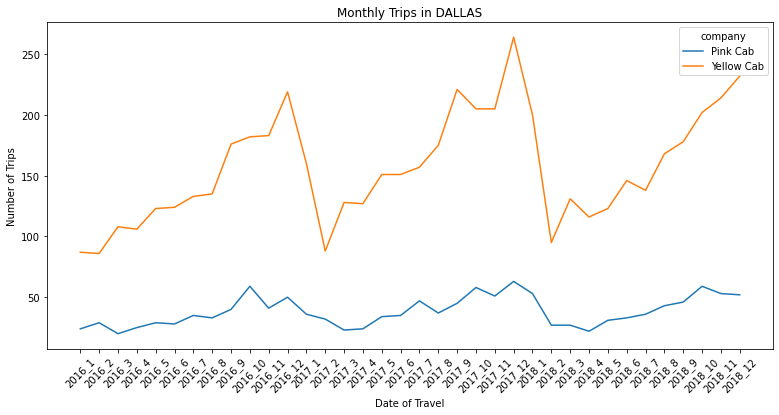

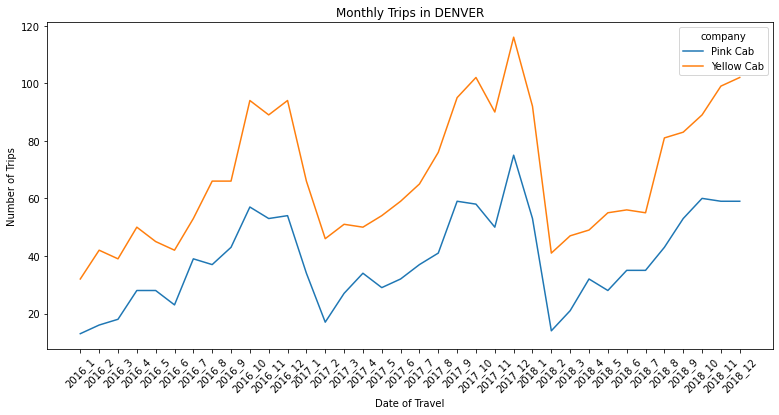

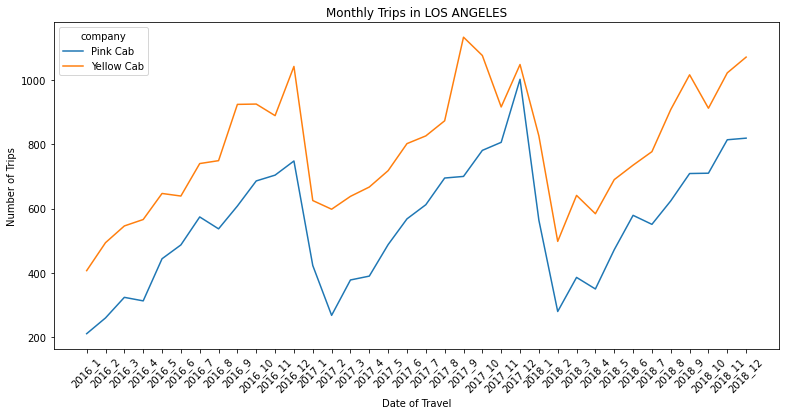

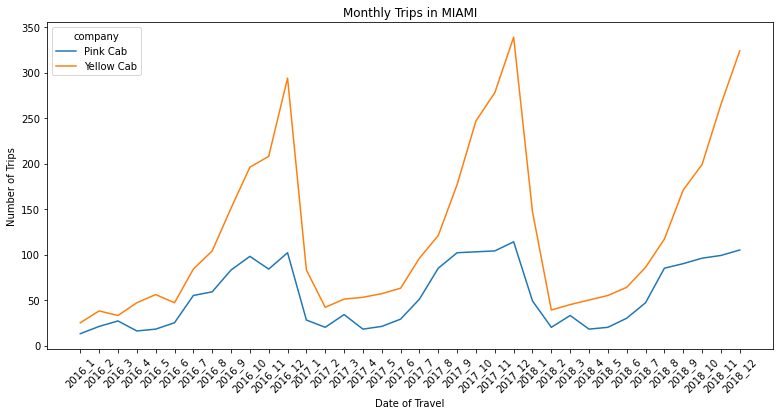

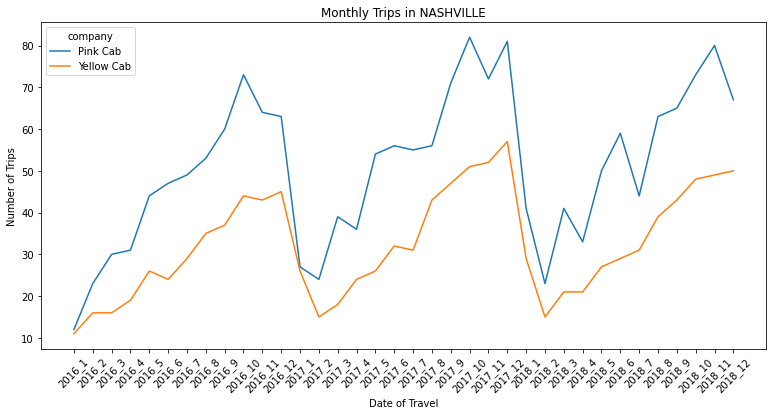

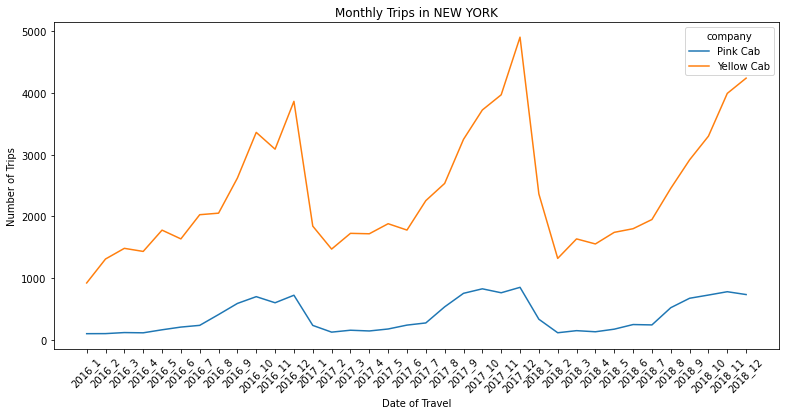

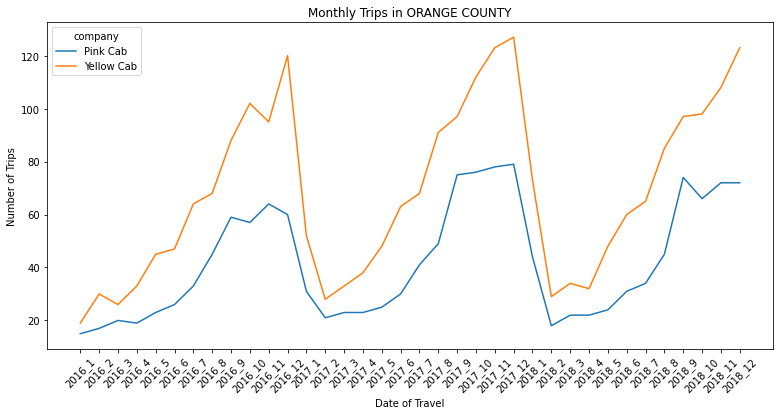

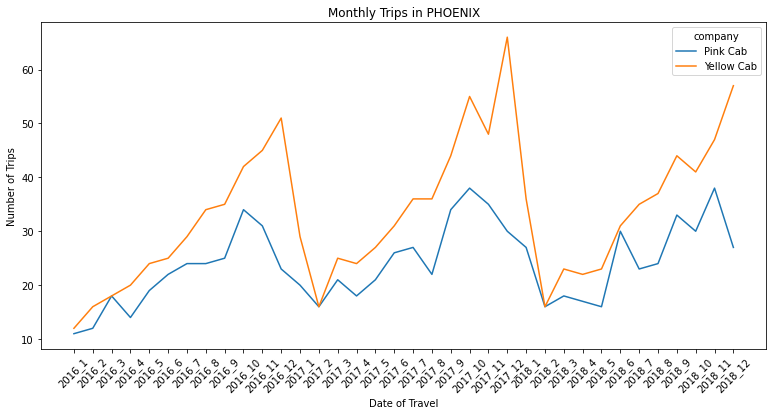

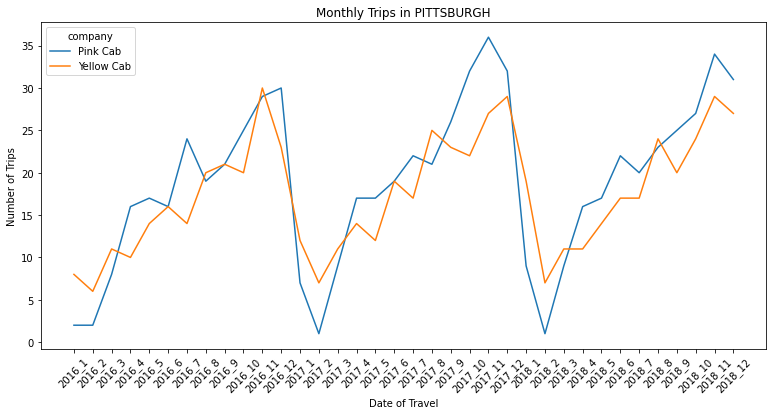

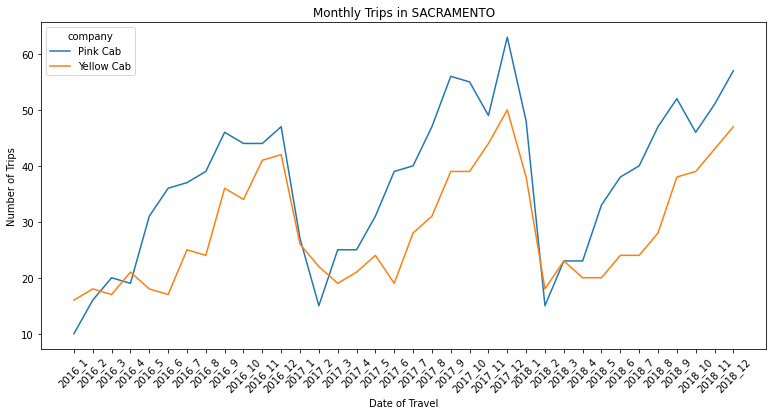

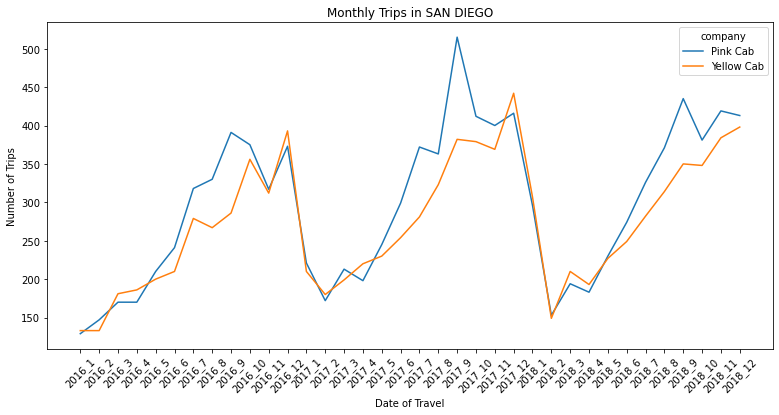

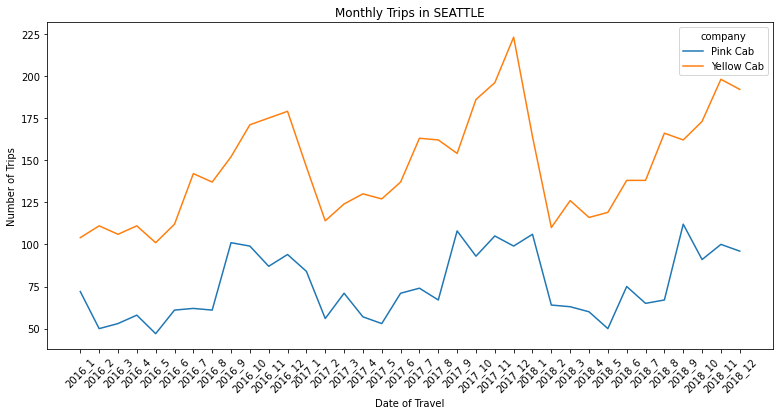

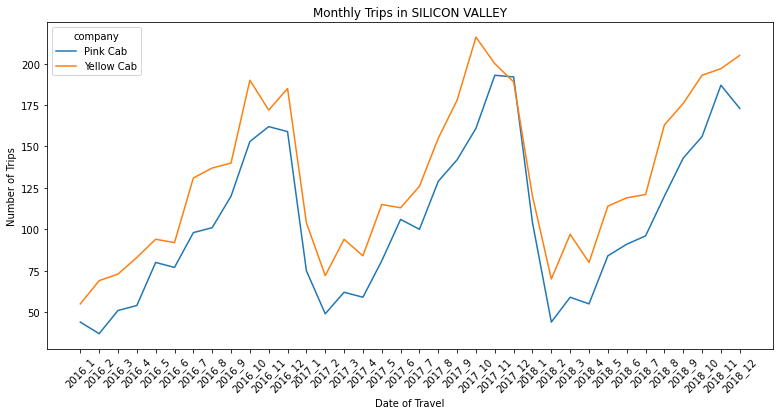

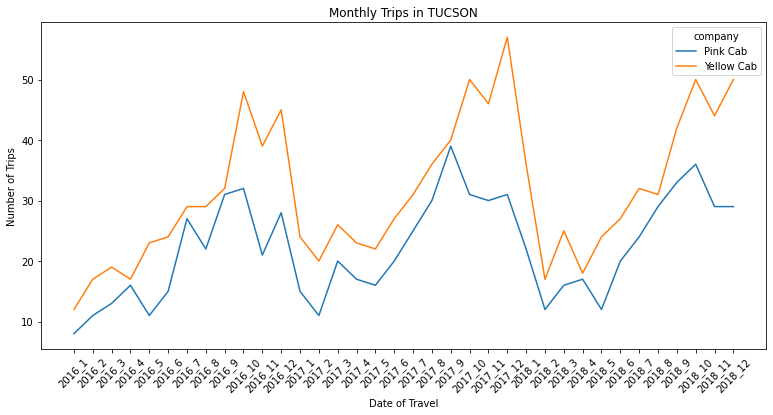

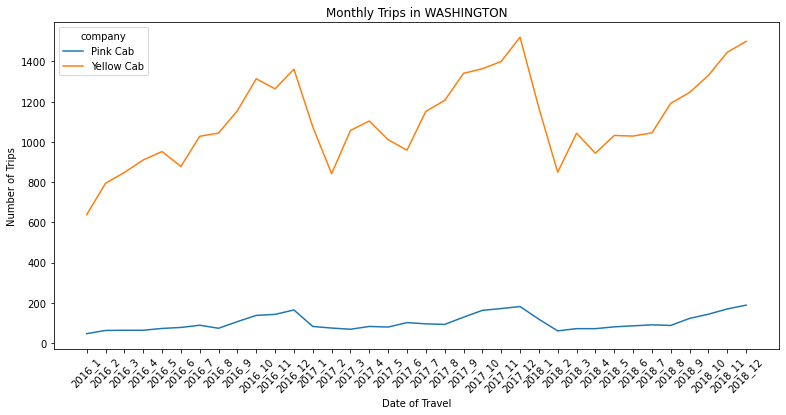

In [560]:
for i in month_trip_city.city.unique():
    plt.figure(figsize = (13,6))
    temp_df = month_trip_city.query(f"city == '{i}'")
    
    sns.lineplot(x = 'month_level', y = 'count', data = temp_df, hue = 'company')

    plt.title(f'Monthly Trips in {i}')
    plt.xlabel('Date of Travel')
    plt.ylabel('Number of Trips')
    plt.xticks(rotation = 45)

- Yellow cab has larger number of trips in these city:
    - Atlanta, Austin, Boston, Chicago, Dallas, Denver, Los Angeles, Miami, New York, Orange County, Phoenix, Seattle, Silicon Valley, Tucson, Washington
- Pink cab has larger number of trips in these city:
   - Nashville and Sacramento

### Visualization - Profit
- Profit = priced charged - cost of trip
##### what is the profit could be made for each trip?
##### what factors related to the amount of profit?

In [561]:
merged_data['profit'] = merged_data.price_charged - merged_data.cost_of_trip
merged_data

,customer_id,gender,age,income_(usd/month),transaction_id,payment_mode,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,population,users,state,year,month,date,day_of_week,profit
0,28712,Male,53,11242,10000013,Cash,2016-01-02,Pink Cab,ATLANTA,9.04,125.20,97.6320,814885,24701,GA,2016,1,2,5,27.5680
1,58925,Male,38,26550,10000029,Card,2016-01-02,Pink Cab,BOSTON,21.34,324.21,226.2040,248968,80021,MA,2016,1,2,5,98.0060
2,58551,Male,25,21734,10000030,Card,2016-01-02,Pink Cab,BOSTON,41.30,646.06,454.3000,248968,80021,MA,2016,1,2,5,191.7600
3,4289,Male,19,28719,10000041,Card,2016-01-02,Pink Cab,CHICAGO,35.02,598.43,406.2320,1955130,164468,IL,2016,1,2,5,192.1980
4,5734,Male,23,22475,10000045,Card,2016-01-02,Pink Cab,CHICAGO,3.24,48.04,33.6960,1955130,164468,IL,2016,1,2,5,14.3440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,52449,Female,40,23569,10439960,Card,2018-12-31,Yellow Cab,WASHINGTON,33.93,474.47,411.2316,418859,127001,DC,2018,12,31,0,63.2384
359388,51614,Female,55,12279,10439984,Card,2018-12-31,Yellow Cab,WASHINGTON,40.00,641.78,484.8000,418859,127001,DC,2018,12,31,0,156.9800
359389,52389,Female,29,5568,10440028,Card,2018-12-31,Yellow Cab,WASHINGTON,26.22,405.25,327.2256,418859,127001,DC,2018,12,31,0,78.0244
359390,51877,Male,46,16993,10440034,Cash,2018-12-31,Yellow Cab,WASHINGTON,34.68,505.38,470.2608,418859,127001,DC,2018,12,31,0,35.1192


In [562]:
merged_data[['km_travelled','price_charged','cost_of_trip','profit']].describe()

,km_travelled,price_charged,cost_of_trip,profit
count,359392.000000,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113,137.253198
std,12.233526,274.378911,157.993661,160.311840
min,1.900000,15.600000,19.000000,-220.060000
25%,12.000000,206.437500,151.200000,28.012000
50%,22.440000,386.360000,282.480000,81.962000
75%,32.960000,583.660000,413.683200,190.030000
max,48.000000,2048.030000,691.200000,1463.966000


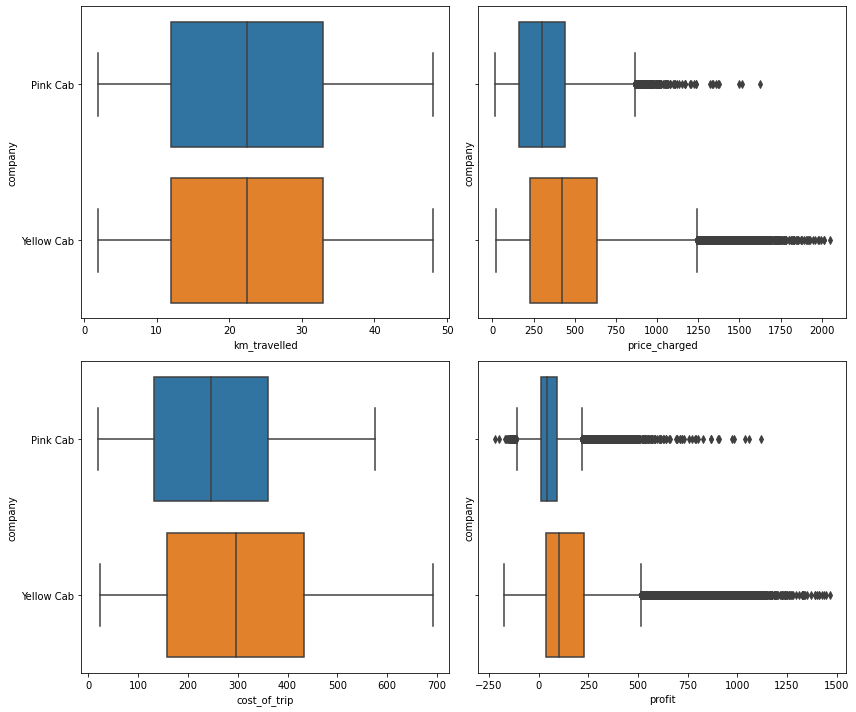

In [563]:
fig, axes = plt.subplots(2,2,figsize=(12,10), sharey = True)
for col, ax in zip(['km_travelled','price_charged','cost_of_trip','profit'], axes.flatten()):
    sns.boxplot(x=col, data=merged_data, y='company', ax=ax)
    plt.tight_layout()

- Profit fits in a gaussian distribution but with high number of outliers, Yellow cab's profit is significantly higher than pink cab; Pink cab had some profit loss.
- Cost trip fits in a uniforom distribution which means all outcomes are mostly alike, Yellow cab's cost is little bit higher than pink cab.
- Price charged fits in a gaussian distribution which skewed to the right, Yellow cab charged more than pink cab.
- Km travelled fits in a uniform distribution, it means both of these two companies having almost same and constant travelled distance.

### Hypothesis
Why Yellow Cab make more profit than Pink Cab, but its cost of trip, price charged are also higher than Pink cab?
- Yellow Cab might have some luxury services for the customers
- Luxury Car burned mor fule than a normal car in a normal service
- Pink Car loosing profit might related to the bad services
- Because of pink car's low price and low cost of trip, their might offer normal services all the time, some of these normal services might serving with drivers' bad attitude, smelly car environment.
#### 1. Higher price charged -> Higher service -> Higher profit
#### 2. Higher Income customer -> Higher Profit
#### 3. Longer distances -> Higher profit 
#### 4. Lower loss -> Higher Profit
#### 5. Weather will affect profit

In [564]:
# calculate iqr for yellow cab and pink cab in order to find out the upper limit for each company
yc_iqr= merged_data[merged_data['company']=="Yellow Cab"].price_charged.quantile(0.75)\
        - merged_data[merged_data['company']=="Yellow Cab"].price_charged.quantile(0.25)
pc_iqr= merged_data[merged_data['company']=="Pink Cab"].price_charged.quantile(0.75)\
        - merged_data[merged_data['company']=="Pink Cab"].price_charged.quantile(0.25)
print(yc_iqr,pc_iqr)

407.2 281.53499999999997


In [565]:
yc_max = merged_data[merged_data['company']=="Yellow Cab"].price_charged.quantile(0.75) + yc_iqr*1.5
pc_max = merged_data[merged_data['company']=="Pink Cab"].price_charged.quantile(0.75) + pc_iqr*1.5
print(yc_max,pc_max)

1244.6799999999998 863.8074999999999


In [566]:
# Create "Premium ride"
premium_ride = []
for i in range(len(merged_data)):
    if merged_data['company'][i] =="Yellow Cab":
        if merged_data['price_charged'][i] >= yc_max:
            premium_ride.append(1)
        else:
            premium_ride.append(0)
    else:
        if merged_data['price_charged'][i] >= pc_max:
            premium_ride.append(1)
        else:
            premium_ride.append(0)
            
merged_data['premium_ride'] = premium_ride
            

## Hypotheis 1. Higher price charged -> Higher service -> Higher profit
- Preimum Ride: Yellow Cab charged more than Pink Cab
- Non Premium Ride: Yellow Cab also charged more than Pink Cab
- Premium rider has wider range of price than Non premium ride

Text(0.5, 1.0, 'Non Premium ride')

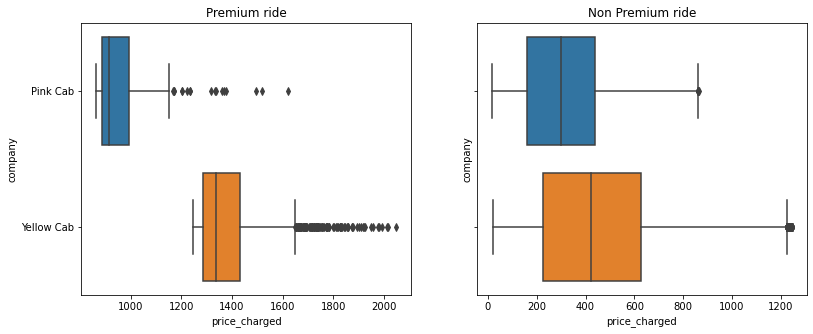

In [567]:
premium = merged_data.query('premium_ride == 1')
non_premium = merged_data.query('premium_ride == 0')

fig, ax= plt.subplots(1,2,figsize=(13,5),sharey=True)

sns.boxplot(x='price_charged', y='company', data = premium, order=['Pink Cab','Yellow Cab'], ax=ax[0]).\
set_title('Premium ride')

sns.boxplot(x='price_charged', y='company', data = non_premium, order=['Pink Cab', 'Yellow Cab'], ax=ax[1]).\
set_title('Non Premium ride')

## Hypotheis 2. Higher Income customer -> Higher Profit

#### Let's see the if the distances travelled and customer's income related to the profit

Text(0.5, 1.0, 'Income - Premium')

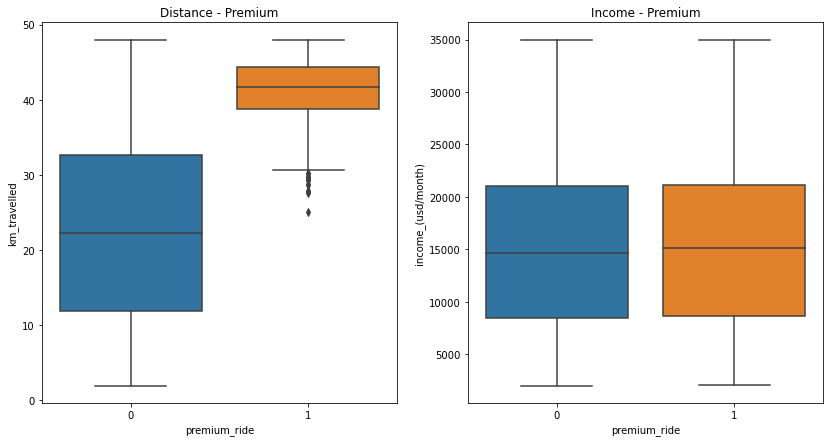

In [568]:
fig, ax= plt.subplots(1,2,figsize=(14,7))

sns.boxplot(x='premium_ride', y='km_travelled', data = merged_data, ax=ax[0]).set_title('Distance - Premium')
sns.boxplot(x='premium_ride', y='income_(usd/month)', data=merged_data, ax=ax[1]).set_title('Income - Premium')

- Distance-Premium: Premium_ride has longer distance than non_premium ride
- Income-Premium: Both of premium and non premium customer almost have the same income distribution
    - The income hypothesis is rejected

## Hypotheis 3. Longer distances -> Higher profit 
### Visualization - pairplot - correlation of km-travelled, price_charged, cost of trip, profit, company

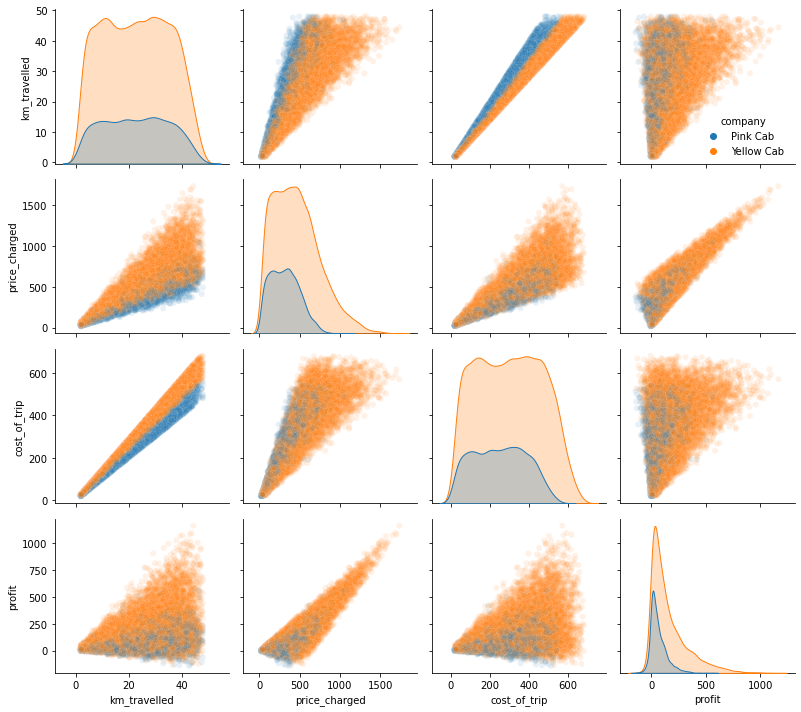

In [569]:
temp_df = merged_data[['km_travelled','price_charged','cost_of_trip','profit','company']].\
sample(frac=0.05, random_state=42)

graph = sns.pairplot(temp_df, hue = 'company', hue_order = ['Pink Cab', 'Yellow Cab'], plot_kws={'alpha': 0.1})
graph._legend.set_bbox_to_anchor((0.98,0.8))
plt.tight_layout()

For yellow cab, the higher price_charged the higher profit gained.
- However, the distribution went down with the increasment of price_charged and profie.
- Pink cab has poor distribution in higher price_charged and profit

<AxesSubplot:>

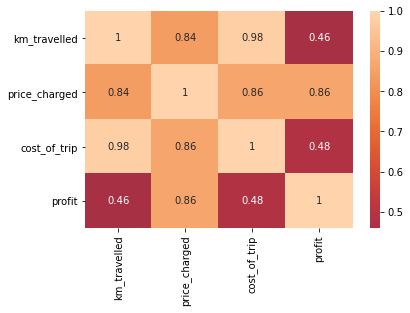

In [570]:
sns.heatmap(temp_df.corr(),annot=True, center=0)

- all factors are correlated
- km_travelled is highly related to price_charged and cost_of_trip
- price_charged is highly related to profit
- cost_of_trip is highly related to price_charged

In [571]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         359392 non-null  int64         
 1   gender              359392 non-null  object        
 2   age                 359392 non-null  int64         
 3   income_(usd/month)  359392 non-null  int64         
 4   transaction_id      359392 non-null  int64         
 5   payment_mode        359392 non-null  object        
 6   date_of_travel      359392 non-null  datetime64[ns]
 7   company             359392 non-null  object        
 8   city                359392 non-null  object        
 9   km_travelled        359392 non-null  float64       
 10  price_charged       359392 non-null  float64       
 11  cost_of_trip        359392 non-null  float64       
 12  population          359392 non-null  int64         
 13  users               359392 no

Text(0.5, 1.0, 'Daily trips - Km Travelled')

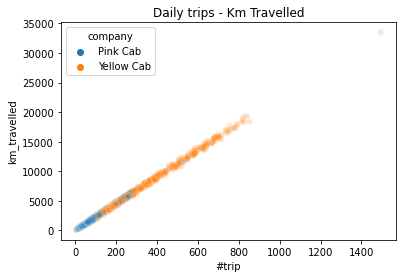

In [572]:
total_trip_distance_related=merged_data.groupby(['date_of_travel','company']).agg({'km_travelled':'sum','city':'count'}).\
rename(columns={'city':'#trip'})
sns.scatterplot(data=total_trip_distance_related, x='#trip', y='km_travelled',hue='company',alpha=0.2).\
set_title('Daily trips - Km Travelled')

- Km travelled and # of trip are highly correlated
- both of these factors could determine companies' loss, revenue and profits

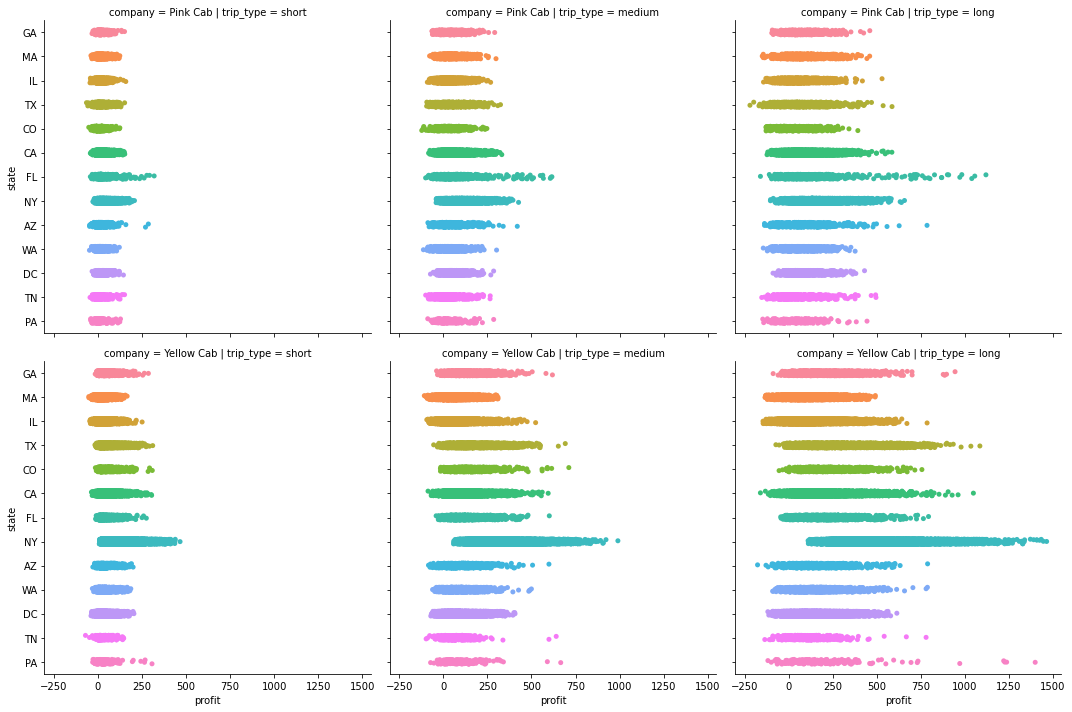

In [573]:
merged_data['trip_type'] = pd.qcut(merged_data.km_travelled, 3, labels = ['short', 'medium', 'long'])
sns.catplot(x = 'profit', y = 'state', data = merged_data, row = 'company', 
           col = 'trip_type');

plt.tight_layout()

- there is a higher probability of making high profits when the trip duration is long across all states.

## Hypothesis 4. Lower loss -> Higher Profit

## Explore Company Loss
#### what factors can cause company to lost money?

In [574]:
loss_df = merged_data.query('profit <= 0')
loss_df

,customer_id,gender,age,income_(usd/month),transaction_id,payment_mode,date_of_travel,company,city,km_travelled,...,population,users,state,year,month,date,day_of_week,profit,premium_ride,trip_type
10,25155,Male,27,10997,10000066,Card,2016-01-02,Pink Cab,DALLAS,13.13,...,942908,22157,TX,2016,1,2,5,-27.2620,0,short
11,25247,Male,26,24178,10000067,Cash,2016-01-02,Pink Cab,DALLAS,33.32,...,942908,22157,TX,2016,1,2,5,-77.9320,0,long
12,30718,Male,52,20255,10000070,Cash,2016-01-02,Pink Cab,DENVER,7.02,...,754233,12421,CO,2016,1,2,5,-21.5360,0,short
34,38635,Male,31,24682,10000356,Card,2016-01-02,Pink Cab,SEATTLE,14.95,...,671238,25063,WA,2016,1,2,5,-0.4550,0,short
389,51246,Male,61,2035,10000378,Card,2016-01-05,Pink Cab,WASHINGTON,29.75,...,418859,127001,DC,2016,1,5,1,-52.4750,0,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359335,3095,Male,33,10614,10438112,Card,2018-12-31,Yellow Cab,CHICAGO,22.42,...,1955130,164468,IL,2018,12,31,0,-12.5120,0,medium
359336,5598,Female,61,11328,10438116,Card,2018-12-31,Yellow Cab,CHICAGO,36.58,...,1955130,164468,IL,2018,12,31,0,-51.4856,0,long
359338,4354,Female,34,2114,10438152,Card,2018-12-31,Yellow Cab,CHICAGO,19.62,...,1955130,164468,IL,2018,12,31,0,-8.7832,0,medium
359340,3647,Female,28,23471,10438192,Card,2018-12-31,Yellow Cab,CHICAGO,38.61,...,1955130,164468,IL,2018,12,31,0,-39.7120,0,long


### Visulization loss - company - city - year

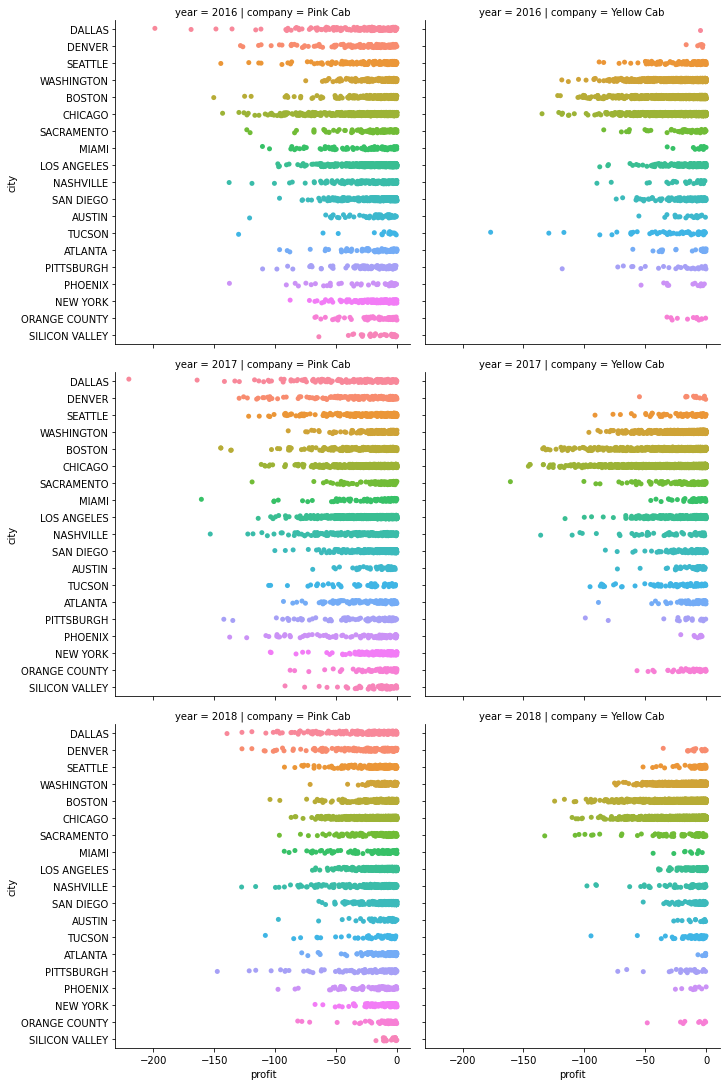

In [575]:
sns.catplot(y = 'city', x = 'profit', col = 'company', data = loss_df, row = 'year')

- for all years, Pink Cab has higher frequency of lossing money than Yellow Cab
- Pink Cab's money lossing is a siginificant factor of causing the lower profit

<AxesSubplot:xlabel='date_of_travel', ylabel='profit'>

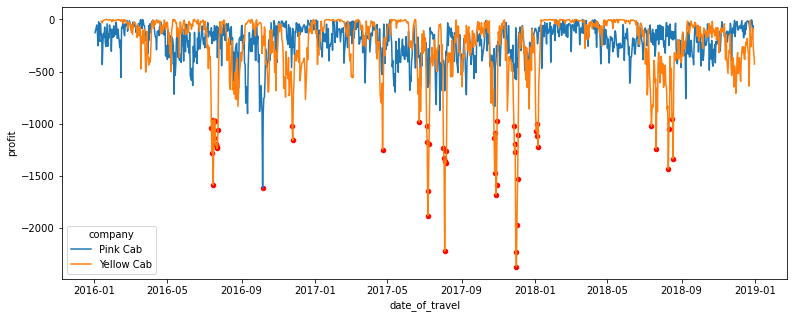

In [576]:
total_loss = loss_df.groupby(['date_of_travel', 'company']).sum()['profit'].sort_values().reset_index()

plt.figure(figsize = (13,5))

ax = sns.lineplot(x = 'date_of_travel', y = 'profit', data = total_loss, hue = 'company', 
             hue_order = ['Pink Cab', 'Yellow Cab'])

total_loss.loc[:50, ["date_of_travel", "profit"]].plot.scatter("date_of_travel", "profit", 
                                                            color = 'red', ax = ax)


- Yellow cab has some flucuation of lossing frequency, however, during regular time, the frequency of moeny loosing is low
- Pink cab also has some flucuation of lossing frequencey, but lossing more money constanly compare to pink cab

In [577]:
total_loss_month = loss_df[['month','profit']]
total_loss_month

,month,profit
10,1,-27.2620
11,1,-77.9320
12,1,-21.5360
34,1,-0.4550
389,1,-52.4750
...,...,...
359335,12,-12.5120
359336,12,-51.4856
359338,12,-8.7832
359340,12,-39.7120


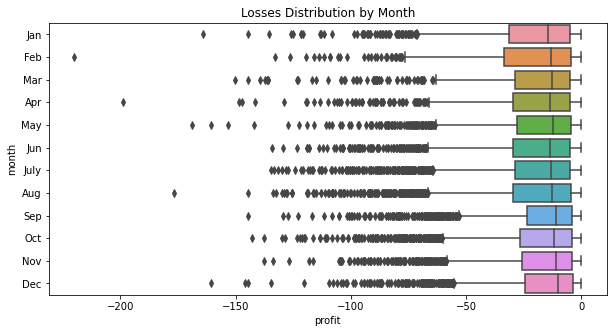

In [578]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize = (10,5));
ax = sns.boxplot(y = 'month', x = 'profit', data = total_loss_month, orient = 'h').\
set_title("Losses Distribution by Month");

plt.yticks(np.arange(0,12,1), labels = months);


- Null Hypothesis: Monthly profit's median are equal for all the group
- Alternative Hypothesis: There is atleast one month's profit are different from other months

In [579]:
jan = total_loss_month.query('month == 1')['profit'].values
feb = total_loss_month.query('month == 2')['profit'].values
mar = total_loss_month.query('month == 3')['profit'].values
apr = total_loss_month.query('month == 4')['profit'].values
may = total_loss_month.query('month == 5')['profit'].values
jun = total_loss_month.query('month == 6')['profit'].values
jul = total_loss_month.query('month == 7')['profit'].values
aug = total_loss_month.query('month == 8')['profit'].values
sep = total_loss_month.query('month == 9')['profit'].values
octr = total_loss_month.query('month == 10')['profit'].values
nov = total_loss_month.query('month == 11')['profit'].values
dec = total_loss_month.query('month == 12')['profit'].values

In [580]:
from scipy import stats

alpha = 0.05
H, p = stats.kruskal(jan, feb, mar, apr, may, jun, jul, aug, sep, octr, nov, dec)

print(f'H-Value: {H:.3f}')
print(f'P-value: {p:.3f}')
print()

alpha = 0.01

if p <= alpha:
    print('P-value less than alpha - Reject H0')
else:
    print('P-value higher than alpha - Cannot Reject H0')

H-Value: 120.944
P-value: 0.000

P-value less than alpha - Reject H0


- P-value <= alpha ---> reject Null Hypothesis
    - The above tests signifies that the median losses differs across months and that losses are higher during some particular months.

### Let's combine monthly profit and loss with different location

In [581]:
#Grouping by year, month, state and company and taking the median of Cab fare and expenses

#I take the median, as the distribution of both profit and price charged in heavily skewed to the right.

cab_monthly_finances = merged_data.groupby(['year', 'month', 'state', 'company']).\
median()[['price_charged', 'cost_of_trip', 'profit']].reset_index()

#Concatenating year and month into a single column
cab_monthly_finances['month_level'] = cab_monthly_finances['year'].astype('str') + "-" + \
                                                cab_monthly_finances['month'].astype('str')

#dropping individual year and month column
cab_monthly_finances.drop(['year', 'month'], axis = 1, inplace = True)

#unpivoting price charge and cost of trip in order to make it easier to plot both in a single axis
cab_monthly_finances = cab_monthly_finances.melt(id_vars = ['state', 'company', 'month_level'], 
                                                 var_name = 'inc_exp', value_name = 'amount')

cab_monthly_finances

,state,company,month_level,inc_exp,amount
0,AZ,Pink Cab,2016-1,price_charged,140.7000
1,AZ,Yellow Cab,2016-1,price_charged,405.4450
2,CA,Pink Cab,2016-1,price_charged,363.5550
3,CA,Yellow Cab,2016-1,price_charged,496.2900
4,CO,Pink Cab,2016-1,price_charged,191.2000
...,...,...,...,...,...
2803,TN,Yellow Cab,2018-12,profit,42.5666
2804,TX,Pink Cab,2018-12,profit,51.5500
2805,TX,Yellow Cab,2018-12,profit,88.8220
2806,WA,Pink Cab,2018-12,profit,53.4515


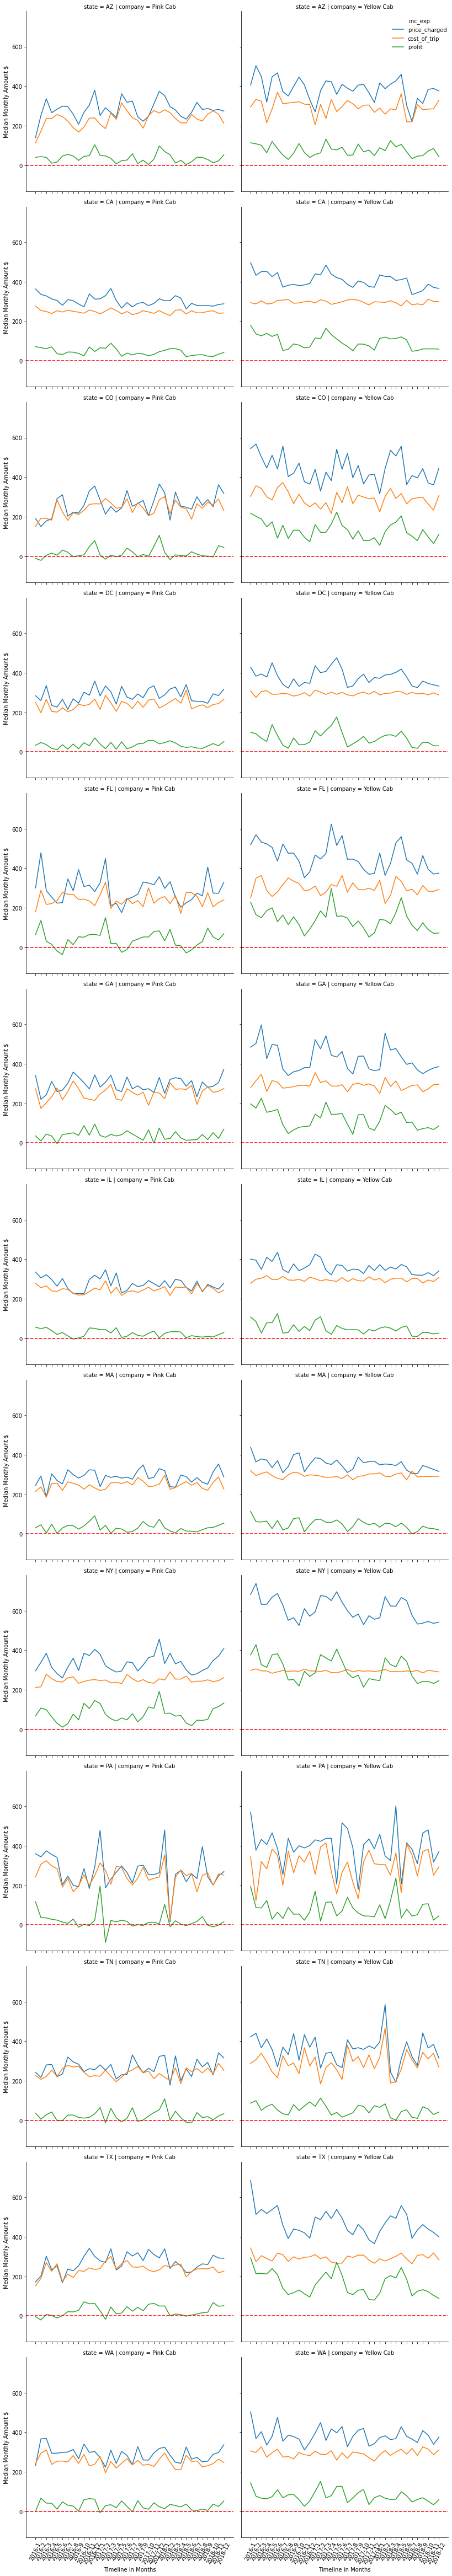

In [582]:
g = sns.relplot(y = 'amount', x = 'month_level', data = cab_monthly_finances, kind = 'line', 
                hue = 'inc_exp', row = 'state', col = 'company');

axes = g.axes.flatten()

for ax in axes:
    ax.axhline(0, ls='--', color='red') #to mark profit below zero

g.set_xticklabels(rotation=65);
plt.tight_layout();

g.set_ylabels("Median Monthly Amount $");
g.set_xlabels("Timeline in Months");
g._legend.set_bbox_to_anchor((0.99, 0.985))

- Left Side: Pink Cab / Right Side: Yellow Cab
- Blue Line: avg price charged for trips over time
- Orange Line: cost of trips over time
- Green Line: change of profits over time
- Red Line: Any part of green line below red line, will represent the part of lossing profit
    - Across all state, Yellow Cab has higher cost of trips
    - Across all state, Pink Cab has lower price charges than Yellow Cab
    - In State PA/Yellow cab, the profits and cost of trip are acrossed
    - For the state of New York, which has the highest Cab passengers compared to any other states, Yellow Cab has the highest Cab Fares compared to Pink Cab during the same time-line. Yellow Cab's profit is significantly higher in New York compared to any other state. Both Cab companies makes median losses during time periods across all states. This is more frequent for Pink Cab in states such as Colorado, Florida, Georgia, Illinois, Massachusetts, Pennsylvania, Tennessee, Texas and Washington. For Yellow Cab, there are barely any months making median losses. This could signify that Yellow Cab perform better across all states and any losses it makes from non-profit trips will be easily offsetted by the amount of profit it makes.

## Hypothesis 5. Weather will affect profit

In [583]:
file_path = "/Users/jacksonyoung/Desktop/Data Glacier/Week2 Cab/data/weather data"
file_list = os.listdir(file_path)
file_list

['StormEvents_details-ftp_v1.0_d2018_c20220425.csv.gz',
 'StormEvents_details-ftp_v1.0_d2017_c20220719.csv.gz',
 'StormEvents_details-ftp_v1.0_d2016_c20220719.csv.gz']

In [584]:
weather_df = pd.DataFrame()
#append all files together
for file in file_list:
    df_temp = pd.read_csv("/Users/jacksonyoung/Desktop/Data Glacier/Week2 Cab/data/weather data/"+file)
    weather_df = weather_df.append(df_temp, ignore_index=True)
weather_df

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201806,6,1810,201806,6,1810,125578,753161,NEBRASKA,31,...,36.0,N,OSHKOSH,41.9300,-102.2100,41.9300,-102.2100,Severe storms developed in the Nebraska Panhan...,Hail predominately penny size with some quarte...,CSV
1,201806,6,1741,201806,6,1741,125578,753160,NEBRASKA,31,...,1.0,NW,BINGHAM,42.0300,-102.1000,42.0300,-102.1000,Severe storms developed in the Nebraska Panhan...,Hail mainly quarter size with some half dollar...,CSV
2,201806,30,2330,201806,30,2332,125988,755273,VERMONT,50,...,3.0,WSW,WEST BERKSHIRE,44.9565,-72.8699,44.9565,-72.8699,Vermont and northern NY influenced by heat rid...,Numerous trees downed by thunderstorm winds.,CSV
3,201806,30,2345,201806,30,2345,125988,755929,VERMONT,50,...,0.0,NE,BELVIDERE JCT,44.7316,-72.7474,44.7316,-72.7474,Vermont and northern NY influenced by heat rid...,At least half dozen trees downed or snapped al...,CSV
4,201806,6,1824,201806,6,1824,125578,753163,NEBRASKA,31,...,5.0,NW,GRANT,40.9000,-101.7900,40.9000,-101.7900,Severe storms developed in the Nebraska Panhan...,Tornado briefly touched down in a field 5 mile...,CSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175723,201604,15,1700,201604,17,500,103707,631990,COLORADO,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A powerful spring snowstorm brought heavy, wet...",Up to 12 inches of snow was measured a William...,CSV
175724,201604,15,1100,201604,17,430,103707,630294,COLORADO,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A powerful spring snowstorm brought heavy, wet...",Storm totals included: 32 inches at Joe Wrigh...,CSV
175725,201604,16,500,201604,17,900,103707,630299,COLORADO,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A powerful spring snowstorm brought heavy, wet...",Official snowfall at Denver International Airp...,CSV
175726,201604,15,2300,201604,17,900,103707,630300,COLORADO,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A powerful spring snowstorm brought heavy, wet...",Storm totals included: 31 inches near Perry P...,CSV


In [585]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175728 entries, 0 to 175727
Data columns (total 51 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BEGIN_YEARMONTH     175728 non-null  int64  
 1   BEGIN_DAY           175728 non-null  int64  
 2   BEGIN_TIME          175728 non-null  int64  
 3   END_YEARMONTH       175728 non-null  int64  
 4   END_DAY             175728 non-null  int64  
 5   END_TIME            175728 non-null  int64  
 6   EPISODE_ID          175728 non-null  int64  
 7   EVENT_ID            175728 non-null  int64  
 8   STATE               175728 non-null  object 
 9   STATE_FIPS          175728 non-null  int64  
 10  YEAR                175728 non-null  int64  
 11  MONTH_NAME          175728 non-null  object 
 12  EVENT_TYPE          175728 non-null  object 
 13  CZ_TYPE             175728 non-null  object 
 14  CZ_FIPS             175728 non-null  int64  
 15  CZ_NAME             175728 non-nul

In [586]:
states = pd.DataFrame({'States':[ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']})
STATES = {"AL":"Alabama", "AK":"Alaska", "AZ":"Arizona", "AR":"Arkansas", "CA":"California", "CO":"Colorado", "CT":"Connecticut", 
          "DC":"Washington DC", "DE":"Delaware", "FL":"Florida", "GA":"Georgia", "HI":"Hawaii", "ID":"Idaho", "IL":"Illinois", 
          "IN":"Indiana", "IA":"Iowa", "KS":"Kansas", "KY":"Kentucky", "LA":"Louisiana", "ME":"Maine", "MD":"Maryland",
          "MA":"Massachusetts", "MI":"Michigan", "MN":"Minnesota", "MS":"Mississippi", "MO":"Missouri", "MT":"Montana",
          "NE":"Nebraska", "NV":"Nevada", "NH":"New Hampshire", "NJ":"New Jersey", "NM":"New Mexico", "NY":"New York", 
          "NC":"North Carolina", "ND":"North Dakota", "OH":"Ohio", "OK":"Oklahoma", "OR":"Oregon", "PA":"Pennsylvania", 
          "RI":"Rhode Island", "SC":"South Carolina", "SD":"South Dakota", "TN":"Tennessee", "TX":"Texas", "UT":"Utah", "VT":"Vermont",
          "VA":"Virginia", "WA":"Washington", "WV":"West Virginia","WI":"Wisconsin", "WY":"Wyoming"}
 
states["States_long"] = states.States.map(STATES)
states.States_long = states.States_long.str.upper()
states

,States,States_long
0,AK,ALASKA
1,AL,ALABAMA
2,AR,ARKANSAS
3,AZ,ARIZONA
4,CA,CALIFORNIA
5,CO,COLORADO
6,CT,CONNECTICUT
7,DC,WASHINGTON DC
8,DE,DELAWARE
9,FL,FLORIDA


In [587]:
weather_df = pd.merge(states, weather_df, left_on='States_long', right_on='STATE')

In [588]:
weather_df['Event_Date']= pd.to_datetime(weather_df['BEGIN_YEARMONTH'],format='%Y%m')
weather_df

,States,States_long,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,...,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,Event_Date
0,AK,ALASKA,201805,5,0,201805,7,0,125360,751776,...,NE,LOWER KALSKAG,61.5046,-160.3819,61.5316,-160.3518,The spring breakup of the river ice on the Kus...,As the spring river ice breakup front moved do...,CSV,2018-05-01
1,AK,ALASKA,201805,8,0,201805,8,0,125360,751777,...,NW,TULUKSAK,61.0946,-161.0375,61.1200,-161.0047,The spring breakup of the river ice on the Kus...,As the spring river ice breakup front moved do...,CSV,2018-05-01
2,AK,ALASKA,201805,5,0,201805,8,0,125360,751779,...,NNE,ANIAK,61.6153,-159.5996,61.5948,-159.5168,The spring breakup of the river ice on the Kus...,As the spring river ice breakup front moved do...,CSV,2018-05-01
3,AK,ALASKA,201802,28,2300,201802,28,2359,123157,738499,...,NaN,NaN,NaN,NaN,NaN,NaN,A 979 MB gale force low moved onto Vancouver I...,Taku wind gusts for Downtown and Douglas range...,CSV,2018-02-01
4,AK,ALASKA,201802,13,647,201802,13,1500,123159,738517,...,NaN,NaN,NaN,NaN,NaN,NaN,Post frontal snow showers hammered Hyder on th...,Post frontal snow showers hammered Hyder on th...,CSV,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167556,WY,WYOMING,201612,30,545,201612,30,800,113146,676690,...,NaN,NaN,NaN,NaN,NaN,NaN,A period of high winds developed near Arlingto...,The WYDOT sensor at Arlington East measured su...,CSV,2016-12-01
167557,WY,WYOMING,201612,30,420,201612,30,845,113146,676691,...,NaN,NaN,NaN,NaN,NaN,NaN,A period of high winds developed near Arlingto...,The WYDOT sensor at Arlington measured sustain...,CSV,2016-12-01
167558,WY,WYOMING,201612,30,625,201612,30,825,113146,676695,...,NaN,NaN,NaN,NaN,NaN,NaN,A period of high winds developed near Arlingto...,The WYDOT sensor at Cooper Cove measured susta...,CSV,2016-12-01
167559,WY,WYOMING,201612,30,450,201612,30,850,113146,676696,...,NaN,NaN,NaN,NaN,NaN,NaN,A period of high winds developed near Arlingto...,The WYDOT sensor at Foote Creek measured susta...,CSV,2016-12-01


In [589]:
weather = weather_df[['EPISODE_ID','EVENT_ID','STATE','States','EVENT_TYPE','CZ_TYPE','Event_Date','MAGNITUDE']]

In [590]:
weather.dropna(axis = 0, inplace = True)


/Users/jacksonyoung/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [591]:
weather.MAGNITUDE.fillna(0, inplace=True)
weather.isna().sum()

/Users/jacksonyoung/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


EPISODE_ID    0
EVENT_ID      0
STATE         0
States        0
EVENT_TYPE    0
CZ_TYPE       0
Event_Date    0
MAGNITUDE     0
dtype: int64

In [592]:
np.sort(weather.EVENT_TYPE.unique())

array(['Hail', 'High Wind', 'Strong Wind', 'Thunderstorm Wind'],
      dtype=object)

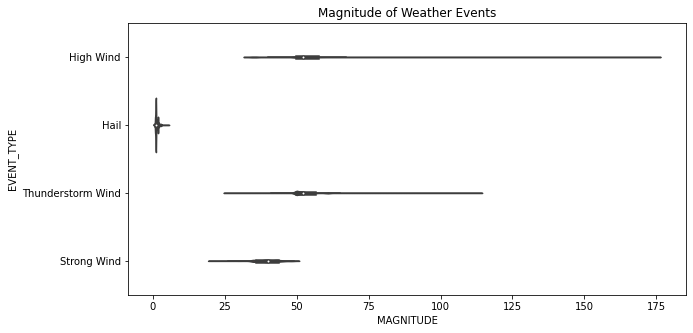

In [593]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'EVENT_TYPE', x = 'MAGNITUDE', data = weather, orient = 'h').\
set_title("Magnitude of Weather Events");

In [594]:
ew_df = weather.groupby(['Event_Date', 'States', 'EVENT_TYPE']).\
        median()[['MAGNITUDE']].reset_index()
ew_df.head()

,Event_Date,States,EVENT_TYPE,MAGNITUDE
0,2016-01-01,AK,High Wind,62.00
1,2016-01-01,AL,Thunderstorm Wind,52.00
2,2016-01-01,AR,Hail,0.94
3,2016-01-01,AZ,High Wind,58.50
4,2016-01-01,AZ,Strong Wind,42.00


In [595]:
merged_data.dropna(axis=0, inplace=True)

In [596]:
merged_data.state.unique()

array(['GA', 'MA', 'IL', 'TX', 'CO', 'CA', 'FL', 'NY', 'AZ', 'WA', 'DC',
       'TN', 'PA'], dtype=object)

In [597]:
new_df = merged_data.query("state != 'DC'").merge(
    ew_df,
    how='left',
    left_on = ['date_of_travel', 'state'], 
    right_on = ['Event_Date', 'States']
).drop(['city', 'payment_mode', 'gender','day_of_week', 'income_(usd/month)'], axis = 1)

new_df.shape

(315527, 21)

In [598]:
new_df.isna().sum()

customer_id            0
age                    0
transaction_id         0
date_of_travel         0
company                0
km_travelled           0
price_charged          0
cost_of_trip           0
population             0
users                  0
state                  0
year                   0
month                  0
date                   0
profit                 0
premium_ride           0
trip_type              0
Event_Date        293364
States            293364
EVENT_TYPE        293364
MAGNITUDE         293364
dtype: int64

In [599]:
new_df.EVENT_TYPE.unique()

array([nan, 'High Wind', 'Strong Wind', 'Thunderstorm Wind', 'Hail'],
      dtype=object)

In [600]:
new_df.MAGNITUDE.fillna(0, inplace = True)
new_df.EVENT_TYPE.fillna('No Event', inplace = True)

In [601]:
new_df.EVENT_TYPE.unique()

array(['No Event', 'High Wind', 'Strong Wind', 'Thunderstorm Wind',
       'Hail'], dtype=object)

In [602]:
new_df.isna().sum()

customer_id            0
age                    0
transaction_id         0
date_of_travel         0
company                0
km_travelled           0
price_charged          0
cost_of_trip           0
population             0
users                  0
state                  0
year                   0
month                  0
date                   0
profit                 0
premium_ride           0
trip_type              0
Event_Date        293364
States            293364
EVENT_TYPE             0
MAGNITUDE              0
dtype: int64

In [603]:
new_df.drop(['Event_Date', 'States'], axis = 1, inplace = True)

In [604]:
new_df.EVENT_TYPE.unique()

array(['No Event', 'High Wind', 'Strong Wind', 'Thunderstorm Wind',
       'Hail'], dtype=object)

In [605]:
new_df.shape

(315527, 19)

In [606]:
new_df.isna().sum()

customer_id       0
age               0
transaction_id    0
date_of_travel    0
company           0
km_travelled      0
price_charged     0
cost_of_trip      0
population        0
users             0
state             0
year              0
month             0
date              0
profit            0
premium_ride      0
trip_type         0
EVENT_TYPE        0
MAGNITUDE         0
dtype: int64

In [607]:
new_df.EVENT_TYPE.unique()

array(['No Event', 'High Wind', 'Strong Wind', 'Thunderstorm Wind',
       'Hail'], dtype=object)

In [608]:
event_trip = new_df.groupby(['date_of_travel', 'EVENT_TYPE']).\
            agg({'state' : 'count', 'MAGNITUDE' : 'median'}).reset_index().\
            rename(columns = {'state' : 'trips'})

event_trip


,date_of_travel,EVENT_TYPE,trips,MAGNITUDE
0,2016-01-02,No Event,151,0.0
1,2016-01-03,No Event,149,0.0
2,2016-01-04,No Event,22,0.0
3,2016-01-05,No Event,37,0.0
4,2016-01-06,No Event,90,0.0
...,...,...,...,...
1206,2018-12-27,No Event,270,0.0
1207,2018-12-28,No Event,738,0.0
1208,2018-12-29,No Event,705,0.0
1209,2018-12-30,No Event,216,0.0


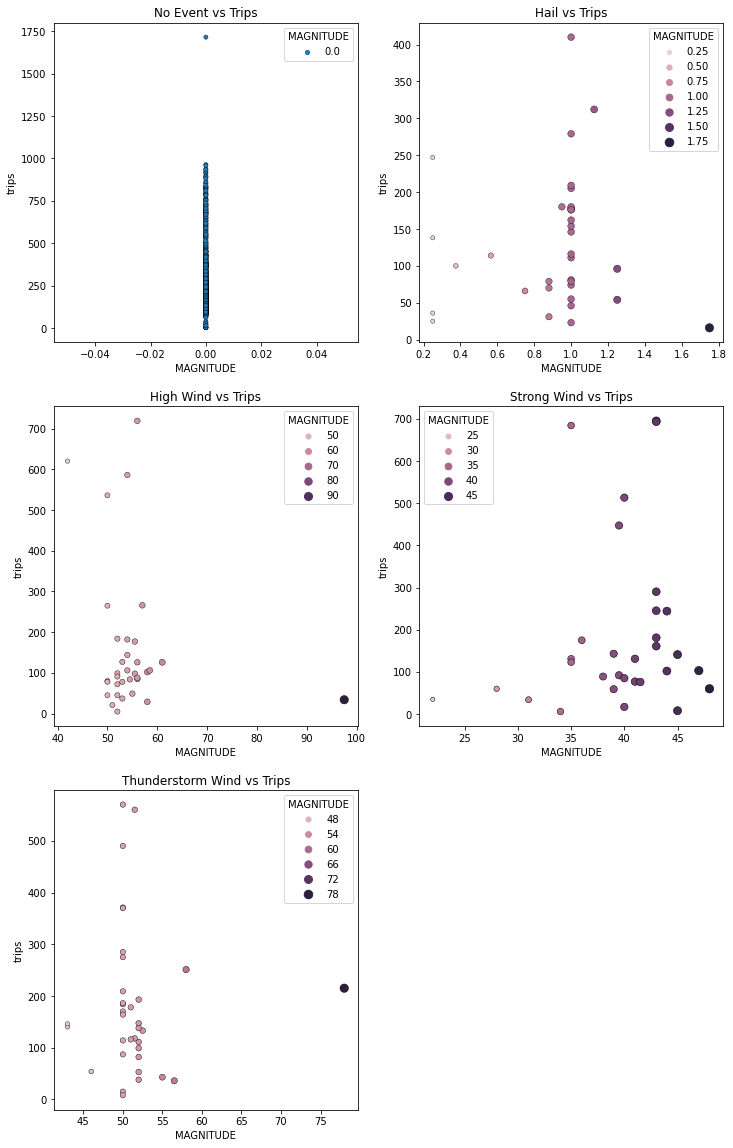

In [609]:
fig, axes = plt.subplots(3,2, figsize = (12,20))

for event, ax in zip(event_trip.EVENT_TYPE.unique(), axes.flatten()):
    sns.scatterplot(x = 'MAGNITUDE', y = 'trips', data = event_trip.query(f'EVENT_TYPE == "{event}"'), 
                   ax = ax, size = 'MAGNITUDE', hue = 'MAGNITUDE', edgecolor = 'black').\
    set_title(f"{event} vs Trips");

fig.delaxes(axes[2,1]);

In [610]:
new_df['EVENT_TYPE'].value_counts()

No Event             293364
Thunderstorm Wind      6349
Strong Wind            5900
High Wind              5490
Hail                   4424
Name: EVENT_TYPE, dtype: int64

In [611]:
new_df['is_extreme'] = np.where(new_df['EVENT_TYPE'] == 'No Event', 0, 1)

In [612]:
new_df['is_extreme'].value_counts()

0    293364
1     22163
Name: is_extreme, dtype: int64

In [613]:
is_extreme_trip = new_df.groupby(['date_of_travel', 'is_extreme']).size().reset_index().\
             rename(columns = {0:'count'})

is_extreme_trip

,date_of_travel,is_extreme,count
0,2016-01-02,0,151
1,2016-01-03,0,149
2,2016-01-04,0,22
3,2016-01-05,0,37
4,2016-01-06,0,90
...,...,...,...
1107,2018-12-27,0,270
1108,2018-12-28,0,738
1109,2018-12-29,0,705
1110,2018-12-30,0,216


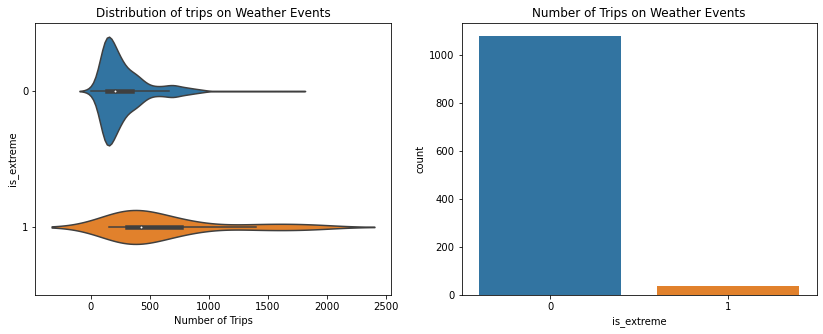

In [614]:
fig, ax = plt.subplots(1,2, figsize = (14,5))
sns.violinplot(y = 'is_extreme', x = 'count', data = is_extreme_trip, orient = 'h', ax = ax[0]).\
set_title("Distribution of trips on Weather Events");

ax[0].set_xlabel('Number of Trips');

sns.countplot(x = 'is_extreme', data = is_extreme_trip, ax = ax[1]).\
set_title("Number of Trips on Weather Events");

- On normal weather events, the distribution of trips are high. 
- However during extreme weather, the trips are still constant, another hand, the distribution is low

### Statictical test

In [615]:
# Null hypothesis, the median of trip are same
# Aternative hypothesis, the median of trip are different
from scipy import stats
 
a = is_extreme_trip.query('is_extreme == 0')['count'].values # non extreme
b = is_extreme_trip.query('is_extreme == 1')['count'].values# extreme

h, p = stats.kruskal(a, b)

print(f'H-Value: {h:.3f}')
print(f'P-value: {p:.3f}')
print()

alpha = 0.05

if p <= alpha:
    print('P-value less than alpha - Reject H0')
else:
    print('P-value higher than alpha - Cannot Reject H0')

H-Value: 38.167
P-value: 0.000

P-value less than alpha - Reject H0
